In [0]:
!rm -rf covid-chestxray-dataset
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 578 (delta 18), reused 16 (delta 4), pack-reused 534
Receiving objects: 100% (578/578), 80.58 MiB | 27.73 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [0]:
import numpy as np
import os
import pandas as pd
import shutil

from sklearn.model_selection import train_test_split

from fastai.vision import *

In [0]:
pd.set_option('display.max_columns', 20)

In [0]:
full_dataset = pd.read_csv('covid-chestxray-dataset/metadata.csv')
print(full_dataset.shape)
print(full_dataset.head(1))

(146, 17)
   Patientid  offset sex   age   finding survival view modality  date  \
0          2     0.0   M  65.0  COVID-19        Y   PA    X-ray  2020   

  location                                           filename  \
0      NaN  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...   

                    doi                                                url  \
0  10.1056/nejmc2001272  https://www.nejm.org/doi/full/10.1056/NEJMc200...   

  license clinical notes other notes Unnamed: 16  
0     NaN            NaN         NaN         NaN  


In [0]:
X_train, X_test, y_train, y_test = train_test_split(full_dataset, full_dataset.finding, test_size=0.2)
X_test.drop('finding', axis=1)

,Patientid,offset,sex,age,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
11,3,10.0,M,74.0,N,PA,X-ray,2004,NaN,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN
47,19,27.0,F,55.0,Y,Axial,CT,"February 6, 2020","Taoyuan General Hospital, Taoyuan, Taiwan",1-s2.0-S0929664620300449-gr3_lrg-d.jpg,10.1016/j.jfma.2020.02.007,https://www.sciencedirect.com/science/article/...,NaN,Chest CT in convalescent stage showed persiste...,NaN,NaN
10,3,9.0,M,74.0,N,PA,X-ray,2004,NaN,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN
107,56,9.0,F,82.0,NaN,AP Supine,X-ray,"March 5, 2020",Italy,D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg,NaN,https://www.sirm.org/2020/03/13/covid-19-caso-43/,NaN,82 year old female patient. On 3/3 he enters t...,"Credit to Federico Paltenghi, Federica Lucev, ...",NaN
128,66,NaN,NaN,NaN,NaN,Axial,CT,2020,NaN,kjr-21-e24-g004-l-b.jpg,10.3348/kjr.2020.0132,https://www.kjronline.org/DOIx.php?id=10.3348/...,CC BY-NC-SA,COVID-19 pneumonia manifesting as radiograph-n...,NaN,NaN
75,34,NaN,M,45.0,NaN,Axial,CT,"Mar 4, 2020",Italy,66298CBF-6F10-42D5-A688-741F6AC84A76.jpeg,NaN,https://www.sirm.org/2020/03/04/covid-19-caso-4/,NaN,In all the lung lobes are evident multiple air...,Credit to Radiology ASST Cremona,NaN
108,57,12.0,F,67.0,Y,PA,X-ray,"January 12, 2020","Hospital of Wuhan University, Wuhan, China",all14238-fig-0001-m-b.jpg,10.1111/all.14238,https://onlinelibrary.wiley.com/doi/full/10.11...,NaN,Chest Xay and CT images of a 67ld woman with o...,NaN,NaN
127,66,NaN,NaN,NaN,NaN,Axial,CT,2020,NaN,kjr-21-e24-g004-l-a.jpg,10.3348/kjr.2020.0132,https://www.kjronline.org/DOIx.php?id=10.3348/...,CC BY-NC-SA,COVID-19 pneumonia manifesting as radiograph-n...,NaN,NaN
34,17,3.0,M,54.0,Y,AP,X-ray,2020,"Myongji Hospital, Goyang, Korea",jkms-35-e79-g001-l-a.jpg,10.3346/jkms.2020.35.e79,https://www.jkms.org/DOIx.php?id=10.3346/jkms....,NaN,Small consolidation in right upper lobe and gr...,NaN,NaN
113,59,5.0,F,46.0,Y,PA,X-ray,"Feb 5, 2020",Taiwan,1-s2.0-S1684118220300608-main.pdf-001.jpg,10.1016/j.jmii.2020.03.003,https://www.sciencedirect.com/science/article/...,CC BY-NC-ND,Chest X-ray films of the case of COVID-19. (A)...,NaN,NaN


In [0]:
positive_cases_covid = X_train['finding']=='COVID-19'

positive_cases = X_train[positive_cases_covid]
negative_cases = X_train[~positive_cases_covid]

test_data_df = X_test

positive_cases_data_list = [files for files in positive_cases['filename']]
negative_cases_data_list = [files for files in negative_cases['filename']]
test_data_list = X_test['filename'].values.tolist()

In [0]:
class_data_paths = 'input/positive', 'input/negative', 'input/test'

if not os.path.isdir(class_data_paths[0]):
  os.makedirs(class_data_paths[0])
if not os.path.isdir(class_data_paths[1]):
  os.makedirs(class_data_paths[1])
if not os.path.isdir(class_data_paths[2]):
  os.makedirs(class_data_paths[2])


for dir, subdir, files in os.walk('covid-chestxray-dataset/images'):
  for _each_file in files:
    if _each_file in positive_cases_data_list:
      shutil.copy(os.path.join(dir, _each_file), class_data_paths[0])
    if _each_file in negative_cases_data_list:
      shutil.copy(os.path.join(dir, _each_file), class_data_paths[1])
    if _each_file in test_data_list:
      shutil.copy(os.path.join(dir, _each_file), class_data_paths[2])

In [0]:
classes=['positive', 'negative']
data = ImageDataBunch.from_folder('input', train=".", valid_pct=0.1, test='test', ds_tfms=get_transforms(), bs=8, size=512, num_workers=4).normalize(imagenet_stats)
print(data.classes)
print(len(data.train_ds),len(data.valid_ds),len(data.test_ds.x))

['negative', 'positive']
132 14 89


In [0]:
precision = Precision()
recall = Recall()
AUC = AUROC()

learn = cnn_learner(data, models.resnet50, metrics=(accuracy, precision, recall, AUC))

In [0]:
learn.fit_one_cycle(1)
learn.fit_one_cycle(2)
learn.save('covid19_model_2epoch.pth')

epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,1.276288,1.116685,0.571429,0.888889,0.615385,0.076923,00:32


epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,1.189700,1.453042,0.571429,1.000000,0.538462,1.000000,00:20
1,0.841442,0.861859,0.642857,1.000000,0.615385,1.000000,00:21


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10)
learn.save('covid19_model_10epoch.pth')

epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.611122,0.638146,0.785714,1.000000,0.769231,1.000000,00:24
1,0.606973,2.305209,0.428571,1.000000,0.384615,0.923077,00:22
2,0.674950,0.849045,0.785714,1.000000,0.769231,1.000000,00:23
3,0.642715,0.239641,0.857143,1.000000,0.846154,1.000000,00:22
4,0.608453,0.130169,0.928571,nan,1.000000,1.000000,00:22
5,0.532588,0.207555,0.857143,1.000000,0.846154,1.000000,00:23
6,0.502531,0.218553,0.857143,1.000000,0.846154,1.000000,00:22
7,0.437045,0.213980,0.928571,1.000000,0.923077,1.000000,00:21
8,0.376337,0.194233,0.928571,1.000000,0.923077,1.000000,00:23
9,0.330317,0.173091,0.928571,1.000000,0.923077,1.000000,00:22


In [0]:
learn.fit_one_cycle(30, max_lr=slice(9e-07,1e-04))
learn.save('covid19_model_30epoch.pth')

epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.260179,0.217261,0.928571,1.000000,0.923077,1.000000,00:23
1,0.282543,0.236404,0.928571,1.000000,0.923077,1.000000,00:21
2,0.275942,0.161407,0.928571,1.000000,0.923077,1.000000,00:23
3,0.299025,0.133935,0.928571,1.000000,0.923077,1.000000,00:22
4,0.255773,0.137534,0.928571,1.000000,0.923077,1.000000,00:22
5,0.249464,0.132867,0.928571,1.000000,0.923077,1.000000,00:23
6,0.240694,0.128515,0.928571,1.000000,0.923077,1.000000,00:22
7,0.234170,0.187085,0.928571,1.000000,0.923077,1.000000,00:23
8,0.213209,0.181818,0.857143,1.000000,0.846154,1.000000,00:21
9,0.219825,0.122419,0.928571,1.000000,0.923077,1.000000,00:22


In [0]:
learn.load('covid19_model_30epoch.pth')

Learner(data=ImageDataBunch;

Train: LabelList (132 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
negative,negative,negative,negative,negative
Path: input;

Valid: LabelList (14 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
positive,positive,positive,positive,positive
Path: input;

Test: LabelList (89 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: input, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottl

In [0]:
learn.fit_one_cycle(5, max_lr=2e-06)
learn.save('covid19_final_model.pth')

epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.174242,0.164068,0.928571,1.000000,0.923077,1.000000,00:22
1,0.141408,0.155404,0.928571,1.000000,0.923077,1.000000,00:22
2,0.144999,0.130431,0.928571,1.000000,0.923077,1.000000,00:24
3,0.158643,0.124008,0.928571,1.000000,0.923077,1.000000,00:22
4,0.143008,0.109601,0.928571,1.000000,0.923077,1.000000,00:22


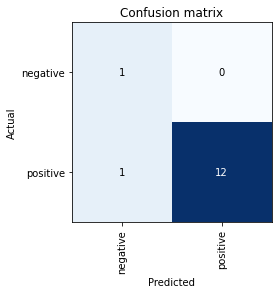

In [0]:
ClassificationInterpretation.from_learner(learn).plot_confusion_matrix()